# Harnessing Machine Learning for interpersonal physical alignment

### organize the data

In [219]:
import pandas as ps
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")

def dfbuilder(files):
    frames=[]
    for file in files:
        temp=ps.read_csv(file)
        temp=temp.ix[700:]
        if str.__contains__(file,"Alone"):
            temp.insert(loc=1, column='Experiment', value="1")
        else:
            if str.__contains__(file,"Sync"):
                temp.insert(loc=1, column='Experiment', value="2")
            else:
                temp.insert(loc=1, column='Experiment', value="3") 
        frames.append(temp)

    final = ps.concat(frames)
    final[" Hand Type"]=Series([1 if i=="right" else 2 for i in final[" Hand Type"]])
    final=final.set_index(" Frame ID")
    dfright=final[final[" Hand Type"]==1]
    dfleft=final[final[" Hand Type"]==2]
    final=ps.merge(dfleft, dfright, left_index=True, right_index=True)
    final=final.drop(["Experiment_y"],axis=1) 
    final=final.dropna()
    return final

In [220]:
#i use glob to see and copy this list of files
files=['Evyatar636771052727603804Spontan.csv','Evyatar636771053639929594Sync.csv','Evyatar636771054555711409Alone.csv',
       'HandRight.csv','Nofar636759795182793299Spontan.csv','Nofar636759796290435160Alone.csv',
       'Nofar636759797397919664Sync.csv','Oriya636759804404113837Spontan.csv','Oriya636759805268396661Alone.csv',
       'Oriya636759806131350399Sync.csv','OryaB636771082736601528Alone.csv','OryaB636771083605535985Spontan.csv',
       'OryaB636771084494502229Sync.csv','Revital636770955999435879Alone.csv','Revital636770957038873193Spontan.csv',
       'Revital636770957894370062Sync.csv','Sachar636771045591258071Spontan.csv','Sachar636771046527112972Sync.csv',
       'Sachar636771047408504303Alone.csv','Shelly636759787508979097Spontan.csv','Shelly636759788383205274Alone.csv',
       'Shelly636759789526313406Sync.csv','Yael636771059544754823Spontan.csv','Yael636771060699529085Sync.csv',
       'Yael636771061659067649Alone.csv','Yoel636760921663075813Spontan.csv','Yoel636760922573364655Alone.csv',
       'Yoel636760923490742912Sync.csv']

train= dfbuilder(files)

In [221]:
files=['HandRight.csv','Itiel636770940701219076Spontan.csv','Itiel636770941638547912Sync.csv',
       'Itiel636770942529041679Alone.csv','Mor636771064635567065Spontan.csv','Mor636771065531910215Sync.csv',
       'Mor636771066407626524Alone.csv','Oded636754669540564461Alone.csv','Oded636754670490266956Spontan.csv',
       'Oded636754671560850581Sync.csv']

test=dfbuilder(files)
test.head()

,Time_x,Experiment_x,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
Frame ID,,,,,,,,,,,,,,,,,,,,,
10092,62.68486,3,2,2,134.6985,208.5222,-15.89654,33.465260,381.0700,-20.853680,...,1.229741,-177.0733,169.1824,91.62305,-267.8270,-49.50602,60.34852,0.636934,2.600819,1.0
10094,62.70143,3,2,2,134.9697,215.8174,-16.54745,-4.292644,415.0160,-52.694000,...,1.203263,-175.5960,170.5128,92.78777,-272.6884,-46.00905,65.60480,0.711114,2.739214,1.0
10096,62.71800,3,2,2,134.5762,222.6880,-17.22218,-34.198680,381.6726,-38.536400,...,1.202949,-175.5448,171.5075,93.55925,-283.5938,-40.49364,72.66209,1.000000,2.823424,1.0
10098,62.73457,3,2,2,133.9560,229.9745,-17.54533,-33.609840,421.2862,-9.113266,...,1.206906,-175.7115,173.6508,94.05950,-296.3912,-32.10971,81.32182,1.000000,2.954811,1.0
10100,62.75167,3,2,2,133.9693,238.5815,-17.42678,20.162700,522.2485,14.256850,...,1.217067,-175.9014,175.5248,93.99304,-304.5399,-25.64118,86.71062,1.000000,3.044502,1.0


## graph

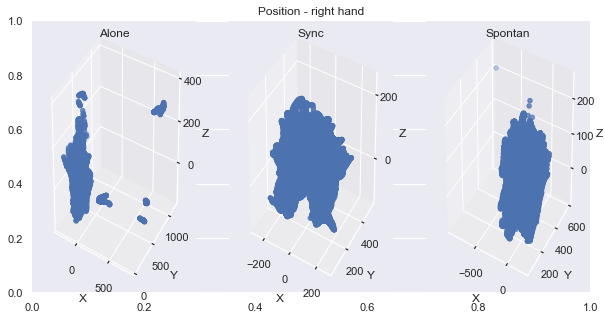

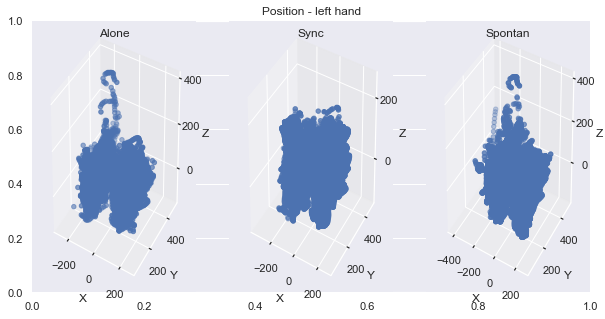

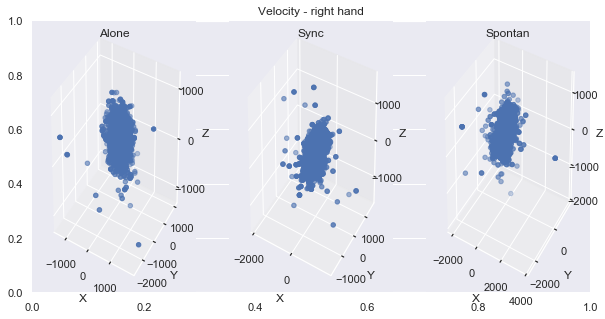

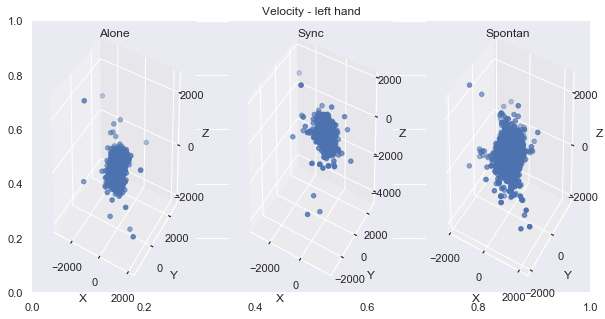

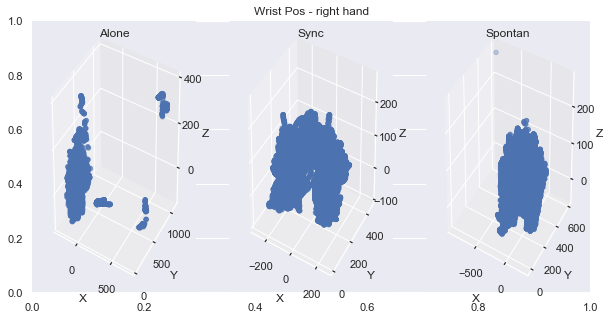

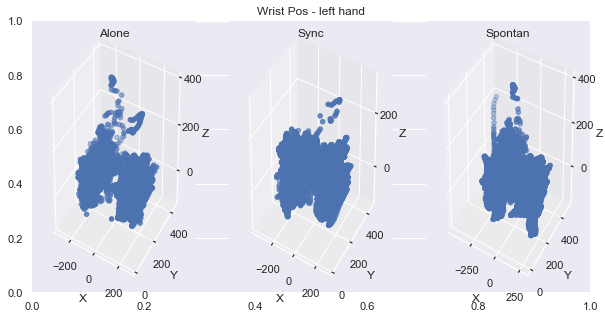

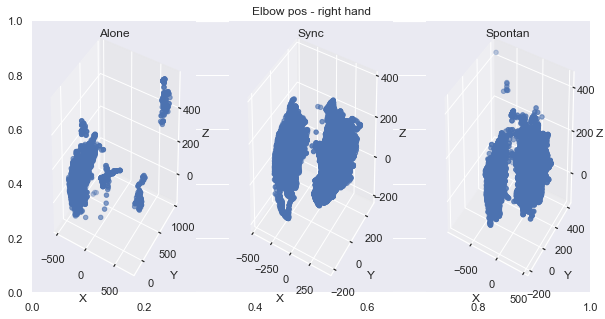

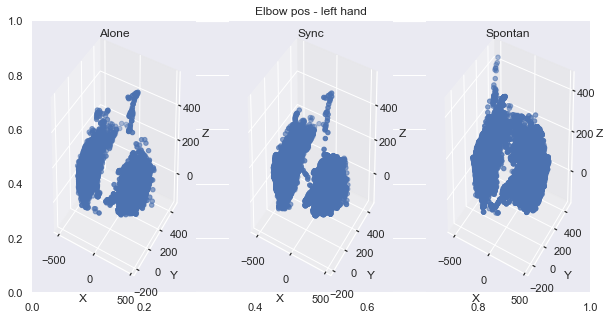

In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

for pose in ["Position", "Velocity", "Wrist Pos"]:
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - right hand")
    for i in range(1,4):
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_x"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_x"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_x"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
        
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - left hand")   
    for i in range(1,4):   
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_y"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_y"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_y"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - right hand")
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_x"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_x"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_x"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
        
fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - left hand")   
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_y"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_y"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_y"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
plt.show()

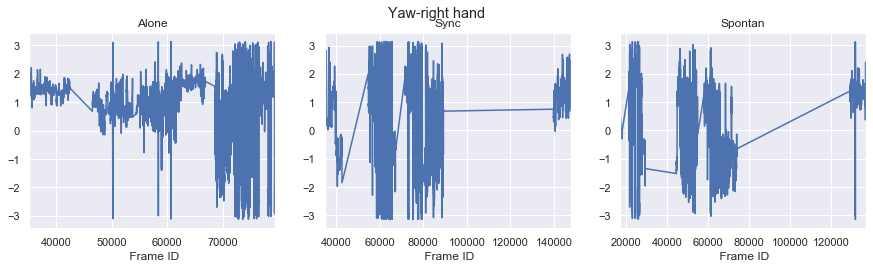

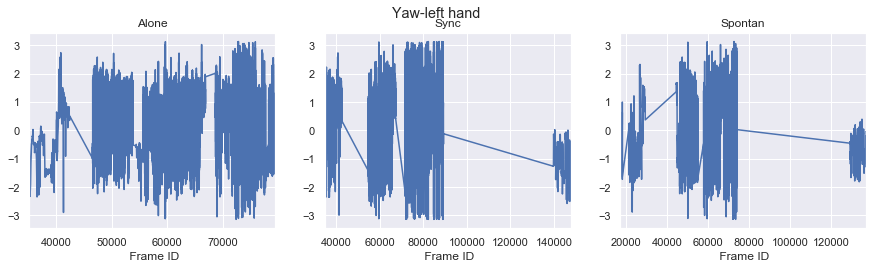

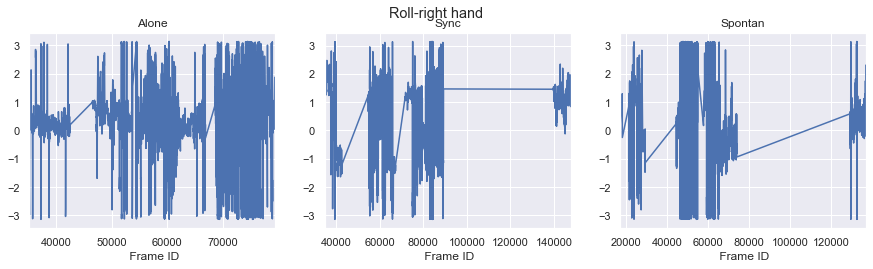

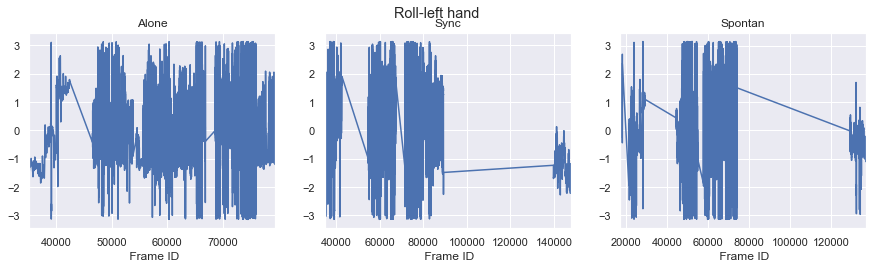

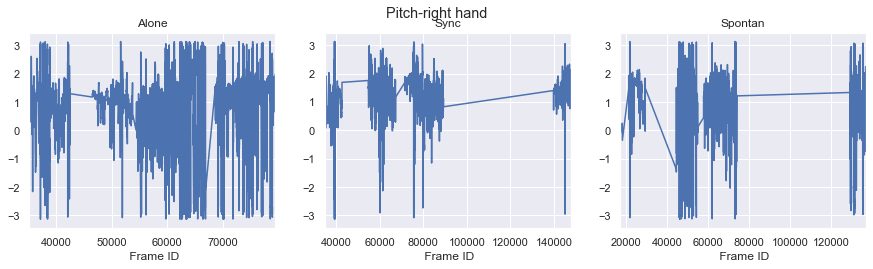

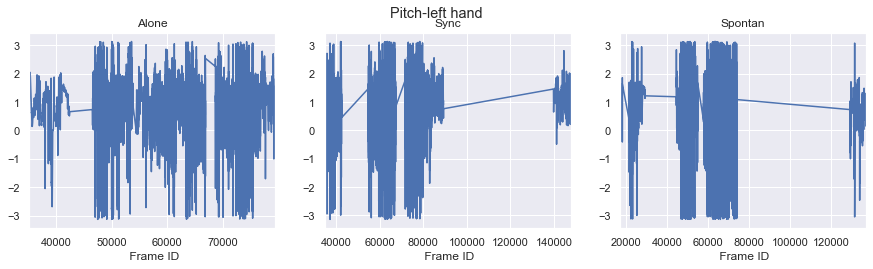

In [5]:
import seaborn as sns
sns.set()
for move in [" Yaw"," Roll"," Pitch"]:
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-right hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_x'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
       
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-left hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_y'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

1 = Alone
2 = Sync
3 = Spontan


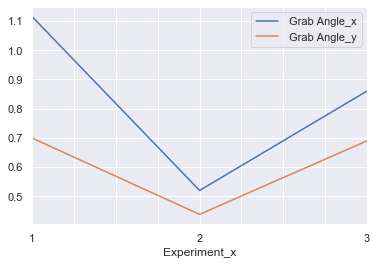

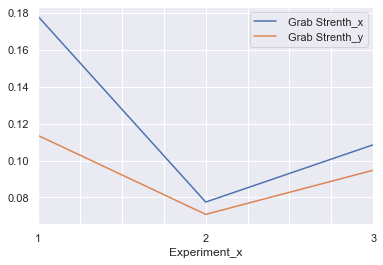

In [6]:
train.groupby(['Experiment_x'])[' Grab Angle_x',' Grab Angle_y'].mean().plot()
train.groupby(['Experiment_x'])[' Grab Strenth_x',' Grab Strenth_y'].mean().plot()
print("1 = Alone")
print("2 = Sync")
print("3 = Spontan")

# Models

In [268]:
train=train[train.index%20==2]
test=test[test.index%20==2]
X_train=train[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_train=train['Experiment_x']
X_test=test[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_test=test['Experiment_x']
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (7694, 40)
Training Labels: (7694,)
Testing FeatureSet: (534, 40)
Testing Labels: (534,)


## naive_bayes

In [361]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.6217228464419475
train score: 0.7260202755393813


In [270]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [271]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.5205992509363296
train score: 0.46737717702105536


In [272]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.5205992509363296
train score: 0.46737717702105536


In [273]:
from sklearn.metrics import f1_score
y_pred_class=clf.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.35646943783325025

## Logistic Regression

In [341]:
#X_train=train[[ ' Elbow pos X_x', ' Elbow Pos Z_x','Time_y']]
#X_test=test[[ ' Elbow pos X_x', ' Elbow Pos Z_x','Time_y']]
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1,max_iter=4,intercept_scaling=2)
logreg.fit(X_train, y_train)
print("test score:",logreg.score(X_test,y_test))
print("train score:",logreg.score(X_train,y_train))

test score: 0.6573033707865169
train score: 0.7535742136729919


In [275]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [276]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the PCA
test score: 0.398876404494382
train score: 0.2743696386794905


In [277]:
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the ICA
test score: 0.3539325842696629
train score: 0.30595269040811024


In [278]:
y_press_class=logreg.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.35646943783325025

## ADABOOST

In [358]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=3,base_estimator=LogisticRegression(tol=2.3))
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.6853932584269663
train score: 0.6390694047309592


In [280]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [281]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.35767790262172283
train score: 0.3333766571354302


In [282]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.1254681647940075
train score: 0.3268780868208994


In [283]:
y_press_class=clf.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.35646943783325025